<style>
div.blue{
    background-color:#e6f0ff; 
    border-radius: 5px; 
    padding: 20px;}
</style> 

<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
 </style>
    
<h1 style="text-align: center; color: purple;" markdown="1">Econ 320 Python Lab Simple Regression </h1>
<h2 style="text-align: center; color: purple;" markdown="1">Handout 3</h2>
<h2 style="text-align: center; color: purple;" markdown="1">Michael Zhao</h2>

## Simple Regression 


You have learned how to motivate your regression analysis by showing summary statistics that provide information about the data that you are using and how to show with graphs and data visualization how are the relationships that can be going on in your data set. 

You have a hypothesis about a linear relationship between your dependent variable $y$ and your independent variable $x$. These two variables are found in the following equation:
$$ y = \beta_0 +\beta_1 x + u$$ 

Your job is to estimate in the most accurate way the population parameters $\beta_0$ and $\beta_1$. 

According to Wooldridge chapter 2, given a sample of data, we choose estimates $\hat\beta_0$ and $\hat\beta_1$  to solve for the following equations:
$$n^{-1}\sum^{n}_{i=1}(y_i - \hat\beta_0 - \hat\beta_1 x_i )=0$$
$$n^{-1}\sum^{n}_{i=1}x_i(y_i - \hat\beta_0 - \hat\beta_1 x_i)=0$$
This creates a system of two equations and two unknown parameters $\hat\beta_0$ and $\hat\beta_1$. 

The first equation can be rewriten as 
$$ \bar{y}= \hat\beta_0 + \hat\beta_1 \bar{x}$$  where $\bar{y}$ and $\bar{x}$ are the sample average of each variable. With this equation we can rewrite $\beta_0$ in terms of $\beta_1, \bar{y}$ and $\bar{x}$. Then after some algebra we can write the equation for $\hat\beta_1$

$$\hat\beta_0 = \bar{y} - \hat\beta_1 \bar{x}$$
$$\hat\beta_1=\frac{\sum^{n}_{i=1}(x_i - \bar{x})(y_i - \bar{y}) }{\sum^{n}_{i=1}(x_i - \bar{x})^2}$$  

You can use Python to calculate these estimates for you. 

## Estimation of a simple regression in Python 
### DGP example
Let's imagine we know the true values for $\beta_0$ and $\beta_1$ so that the population regresion equation is $$y=9+8x+u$$
and you will estimate the model $$ y = \beta_0 +\beta_1 x + u$$ 

What can you say about your estimates $\hat\beta_0$ and $\hat\beta_1$ and the true parameters $\beta_0$ and $\beta_1$? Let's look at the example:

In [1]:
# Import your packages 
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.optimize import minimize

In [2]:
# Set the seed to generate reproducible results

birthday = '09282004'
# Set NumPy Seed
rng = np.random.RandomState(int(birthday))

# Generate de population of x and u normally distributed variables 
# of a million observations and y following the equation below.

beta0=9
beta1=8

u = rng.normal(loc = 0, scale = float(1)**0.5, size = 1000000)
x = rng.normal(loc = 10, scale = float(1)**0.5, size = 1000000)
y = beta0 + beta1 * x + u

# Put all this in a dataframe
data = {"x": x, "u": u, "y": y}
data = pd.DataFrame(data)

# make this more realistic we take a sample of this population. 

sample = data.sample(5000, replace = False, random_state=389)

### Step-by-Step calculation of parameters 
Following the steps above, once you define what your dependent variable (y) and independent variable (x) are, you can just create the objects and plug them into the equations to calculate the estimated parameters.  See the code below, you can just replace x and y for each specific example. 

In [3]:
# ingredients to the OLS formulas:
sumy = np.sum(sample.y - np.mean(sample.y))
sumxy = np.sum((sample.x - np.mean(sample.x))*(sample.y - np.mean(sample.y)))
sumx2 = np.sum((sample.x - np.mean(sample.x))**2)
sumy2 = np.sum((sample.y - np.mean(sample.y))**2)
x_bar = np.mean(sample.x)
y_bar = np.mean(sample.y)
# manual calculation of OLS coefficients:
b1 = sumxy/sumx2
b0 = y_bar-b1*x_bar

print(f'b1: {b1}\n')
print(f'b0: {b0}\n')

b1: 7.989597963799207

b0: 9.105242508212456



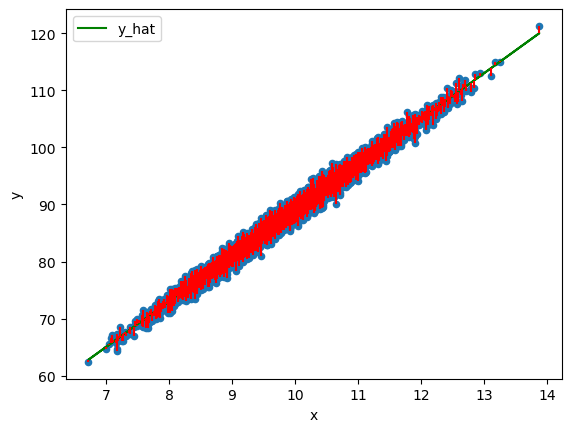

In [4]:
sample['y_hat'] = b0 + b1 * sample['x']
sample['error'] = sample['y_hat'] - sample['y']
fig, ax = plt.subplots()
sample.plot(x='x',y='y', kind='scatter', ax=ax)
sample.plot(x='x',y='y_hat', kind='line', ax=ax, color='g')
plt.vlines(sample['x'], sample['y_hat'], sample['y'], color='r');

### Variance-Covariance method

We are interested in estimating the population parameters 

$\beta_0$ and $\beta_1$of the simple regression model $$ y= \beta_0 + \beta_1x + u$$

Last class we learned different ways to code the estimation of population
parameters $\hat\beta_0$ and $\hat\beta_1$. 
According to Wooldridge you can also use the formula $$\beta_1= Cov(x,y)/var(x)$$ and $$\beta_0=\bar{y}- \hat{\beta_1}x$$ to find the ordinary least squares estimators (OLS). This measn that for a given sample and a simple regression we just need to calculate $\bar{y}, \bar{x}, Cov(x,y), Var(x)$

The Python code to find betas using the equations above is: 

In [5]:
# ingredients to the OLS formulas:
cov_xy =  np.cov(sample.x,sample.y)[1,0] # access 2. row and 1. column of covariance matrix
var_x = np.var(sample.x,ddof=1)
x_bar = np.mean(sample.x)
y_bar = np.mean(sample.y)


# manual calculation of OLS coefficients:
b1 = cov_xy/var_x
b0 = y_bar - b1 * x_bar
print(f'b1: {b1}\n')
print(f'b0: {b0}\n')
  

b1: 7.989597963799239

b0: 9.105242508212143



### Using the `minimize()` function  from scipy.optimize
In R you can also use the optimization function to  estimate the population paramaters.

Remember that you want to estimate the population parameters that minimize the residual residual sum of squares (RSS or SSR). The equation for RSS is 
$$ SSR= \sum^{n}_{i=1}\hat{u_i}^2=\sum^{n}_{i=1}(y_i - \hat\beta_0 - \hat\beta_1 x_i)^2$$
The funtion `minimize()` optimizes a function and finds the parameters. Here you create a vector of parameters called and initialize it <br>
`b = np.array([0.5,0.5])` . See the code below:

In [6]:
#Create initial values for the Beta parameters
b = np.array([0.5,0.5])

#create a column of constants
k= np.ones(len(sample.x))

# Create function for sum of square residuals (SSR)
def sse(b,y,x,k):
    return np.sum((y-b[0]*k-b[1]*x)**2)

#Use minimize from scipy.optimize to find the parameters beta that minimize the SSR
resa = minimize(fun=sse,
                args=(sample.y, sample.x, k),
                x0 = b)

# print results
print(resa['x'])

[9.10524864 7.98959735]


### The `smf.ols()` command 

Python has a module to make your life easier to allow you to do more sofisticated regressions. The statsmodels modul
Python has a built in function that finds the OLS estimates of the population parameters . This is the `smf.ols()`command, which stands for **O**rdinary **L**east **S**quares. This command will be the workhorse of our class during the semester; it provides you all the information you need for your regression results. Today we will only see how it estimates the parameters. We will learn all about this command in future classes. 

Code to estimate the equation $$y=\beta_0+\beta_1x$$ 

In [7]:
# estimate model using OLS command:
reg = smf.ols(formula = "y~x",data = sample)
results = reg.fit()
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')
results.summary()

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 3.093e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:20:19   Log-Likelihood:                -7138.7
No. Observations:                5000   AIC:                         1.428e+04
Df Residuals:                    4998   BIC:                         1.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1052      0.144

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 3.093e+05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:20:19   Log-Likelihood:                -7138.7
No. Observations:                5000   AIC:                         1.428e+04
Df Residuals:                    4998   BIC:                         1.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1052      0.144     63.172      0.000       8.823       9.388
x              7.9896      0.014    556.108      0.000       7.961       8.018
==============================================================================
Omnibus:                        1.758   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.706
Skew:                          -0.041   Prob(JB):                        0.426
Kurtosis:                       3.039   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

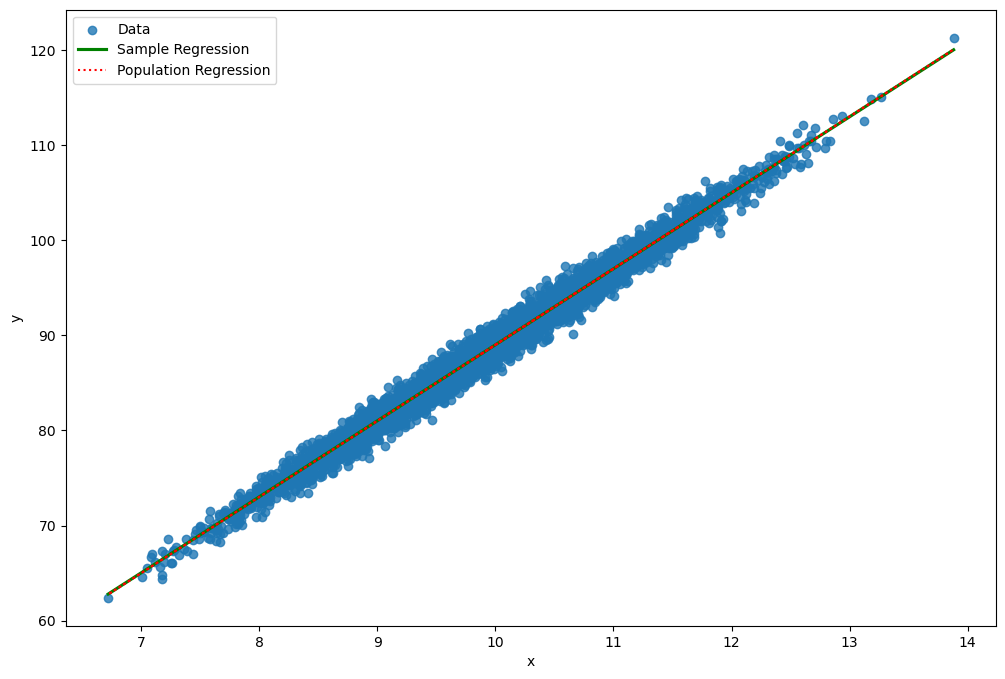

In [8]:
# Create a graph where you plot the data, 
# the population regression line 
# and the fitted values 
# set up the size 
plt.rcParams['figure.figsize'] = [12, 8]

sns.regplot(x = "x",y = "y", data = sample, line_kws={'color':'green'}, ci=None);
plt.plot(sample["x"], 9+8*sample["x"], ':r');
plt.legend(["Data","Sample Regression",'Population Regression'],loc='upper left');
    

## In-class exercise
Now let's use the data wage1 from last class to estimate the equation 
$$log(wage) = \beta_0 + \beta_1 education + u$$
in the one of the two different ways we learned today. Do you obtain the same results?

In [9]:
# HINTS
# Load wage data using wooldridge package 
# np.log(varname) works in the regression command to introduce a variable in log.    
wage = woo.dataWoo('wage1')
reg = smf.ols(formula = 'np.log(wage) ~ educ',data = wage)
results = reg.fit()
# print results using summary:
print(f'results.summary(): \n{results.summary()}\n')
results.summary()

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           3.27e-25
Time:                        14:20:19   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           3.27e-25
Time:                        14:20:19   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098
==============================================================================
Omnibus:                       11.804   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.811
Skew:                           0.268   Prob(JB):                      0.00100
Kurtosis:                       3.586   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)


now = 2025-02-07 14:20:19.441110
date and time = 07/02/2025 14:20:19


&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON320 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;

In [11]:
!jupyter nbconvert --to html H3E_320Lab_SimpleregP1.ipynb

[NbConvertApp] Converting notebook H3E_320Lab_SimpleregP1.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 470517 bytes to H3E_320Lab_SimpleregP1.html
